Imports

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


Loading the Dataset

In [9]:
real_estate_valuation = fetch_ucirepo(id=477) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
df = pd.concat([X,y],axis=1)
print(df.columns)
# I renamed the columns to my own convenience 
df.columns = ['Transaction_Date','House_Age','Nearest_Station','N_Conv_Stores','Lat','Long','Unit_Area']
print(df.columns)


Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
Index(['Transaction_Date', 'House_Age', 'Nearest_Station', 'N_Conv_Stores',
       'Lat', 'Long', 'Unit_Area'],
      dtype='object')


Initial Inspection

In [10]:
print("Initial Rows of the dataframe: ")
print(df.head(3))
print("Information of the Dataframe: ")
print(df.info)

Initial Rows of the dataframe: 
   Transaction_Date  House_Age  Nearest_Station  N_Conv_Stores       Lat  \
0          2012.917       32.0         84.87882             10  24.98298   
1          2012.917       19.5        306.59470              9  24.98034   
2          2013.583       13.3        561.98450              5  24.98746   

        Long  Unit_Area  
0  121.54024       37.9  
1  121.53951       42.2  
2  121.54391       47.3  
Information of the Dataframe: 
<bound method DataFrame.info of      Transaction_Date  House_Age  Nearest_Station  N_Conv_Stores       Lat  \
0            2012.917       32.0         84.87882             10  24.98298   
1            2012.917       19.5        306.59470              9  24.98034   
2            2013.583       13.3        561.98450              5  24.98746   
3            2013.500       13.3        561.98450              5  24.98746   
4            2012.833        5.0        390.56840              5  24.97937   
..                ...       

Discriptive Analysis

In [11]:
print(df.describe(include="all"))

       Transaction_Date   House_Age  Nearest_Station  N_Conv_Stores  \
count        414.000000  414.000000       414.000000     414.000000   
mean        2013.148971   17.712560      1083.885689       4.094203   
std            0.281967   11.392485      1262.109595       2.945562   
min         2012.667000    0.000000        23.382840       0.000000   
25%         2012.917000    9.025000       289.324800       1.000000   
50%         2013.167000   16.100000       492.231300       4.000000   
75%         2013.417000   28.150000      1454.279000       6.000000   
max         2013.583000   43.800000      6488.021000      10.000000   

              Lat        Long   Unit_Area  
count  414.000000  414.000000  414.000000  
mean    24.969030  121.533361   37.980193  
std      0.012410    0.015347   13.606488  
min     24.932070  121.473530    7.600000  
25%     24.963000  121.528085   27.700000  
50%     24.971100  121.538630   38.450000  
75%     24.977455  121.543305   46.600000  
max     

In [13]:
# Missing Value
print(df.isnull().sum())

Transaction_Date    0
House_Age           0
Nearest_Station     0
N_Conv_Stores       0
Lat                 0
Long                0
Unit_Area           0
dtype: int64


Exploratory Analysis

Index(['Transaction_Date', 'House_Age', 'Nearest_Station', 'N_Conv_Stores',
       'Lat', 'Long', 'Unit_Area'],
      dtype='object')


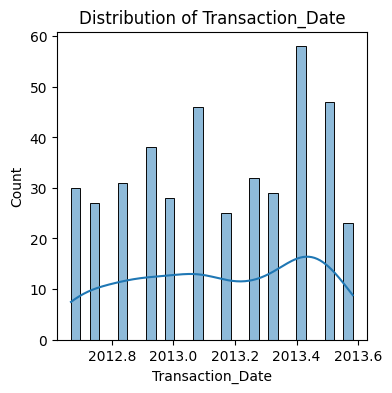

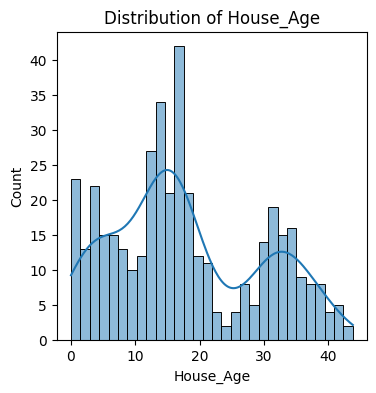

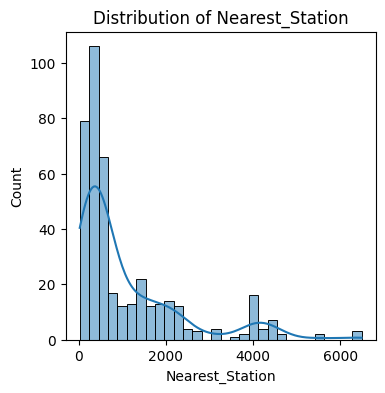

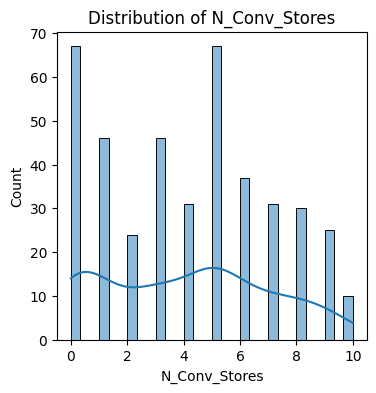

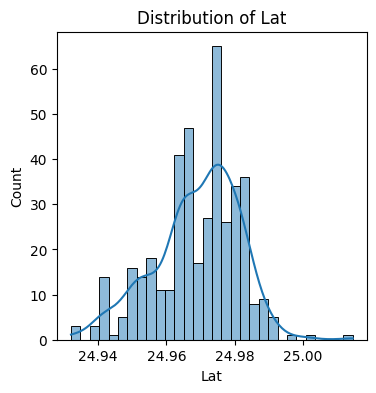

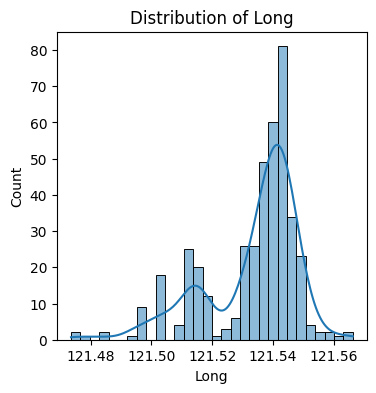

In [15]:
#Histplot
print(df.columns)
for i in df.columns.drop('Unit_Area'):
    plt.figure(figsize=(4,4))
    sns.histplot(df[i],kde=True,bins=30)
    plt.title(f"Distribution of {i}")
    plt.show()

Index(['Transaction_Date', 'House_Age', 'Nearest_Station', 'N_Conv_Stores',
       'Lat', 'Long', 'Unit_Area'],
      dtype='object')


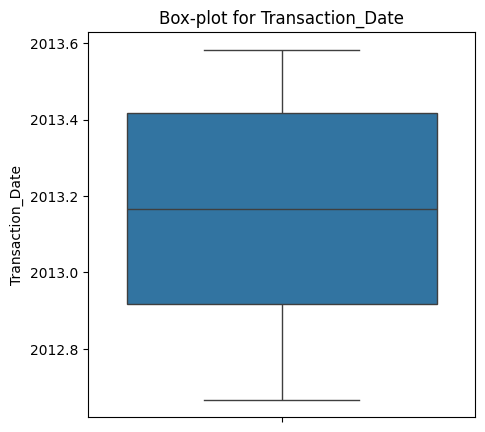

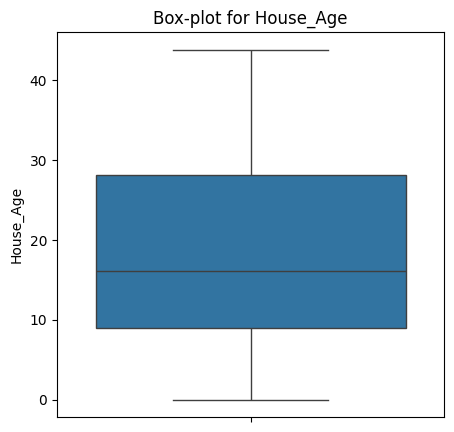

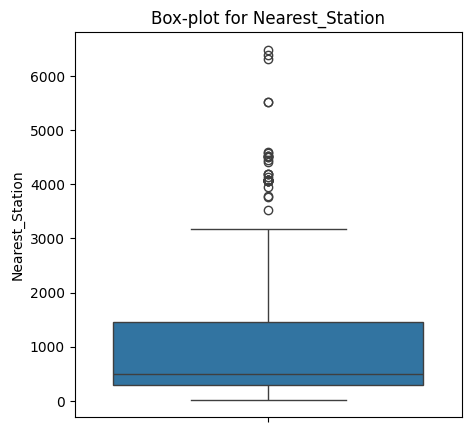

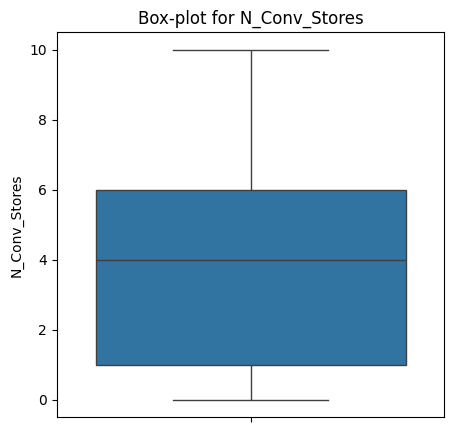

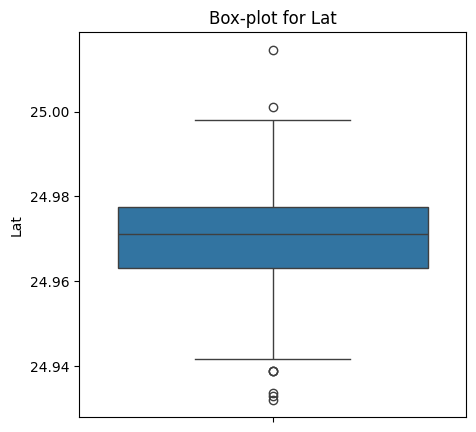

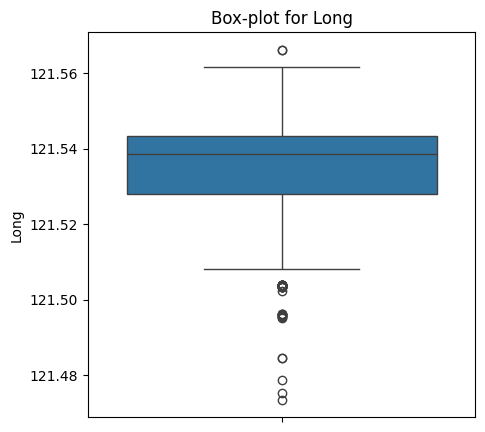

In [16]:
# Box Plot
print(df.columns)
for i in df.columns.drop('Unit_Area'):
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])
    plt.title(f'Box-plot for {i}')
    plt.show()

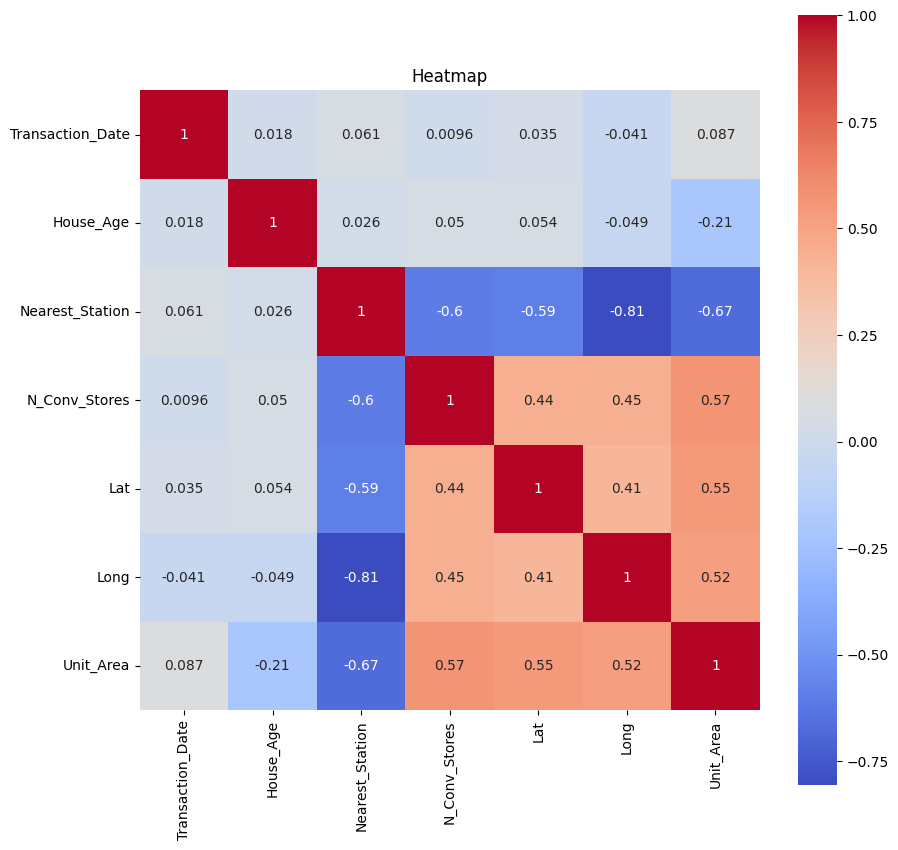

In [19]:
#Heat Map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',square=True)
plt.title("Heatmap")
plt.show()

In [28]:
#Polar Plot
print(f'Columns {df.columns}')
fig = px.scatter_polar(df,r=df['Unit_Area'])
fig.show()

Columns Index(['Transaction_Date', 'House_Age', 'Nearest_Station', 'N_Conv_Stores',
       'Lat', 'Long', 'Unit_Area'],
      dtype='object')


In [29]:
#Pair Plot
print(df.columns)
fig = px.scatter(df)
fig.show()

Index(['Transaction_Date', 'House_Age', 'Nearest_Station', 'N_Conv_Stores',
       'Lat', 'Long', 'Unit_Area'],
      dtype='object')


In [35]:
# Area PLot
print(df.columns)
for i in df.columns.drop('Unit_Area'):
    fig = px.area(df,x=df['Unit_Area'],y=df[i])
    fig.show()


Index(['Transaction_Date', 'House_Age', 'Nearest_Station', 'N_Conv_Stores',
       'Lat', 'Long', 'Unit_Area'],
      dtype='object')


In [51]:
# Funnel Plot
fig = px.funnel(df)
fig.show()